# QCTO - Workplace Module

### Project Title: Water pollution levels
#### Done By: Jeremy Africa

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

Water Quality Analysis Project

1. Problem Statement:

Access to clean and safe water is a fundamental human need, yet water pollution continues to pose a serious threat to ecosystems and human health worldwide. Industrial discharges, agricultural runoff, and domestic waste contribute significantly to the degradation of river water quality.

The dataset River water parameters (1).csv contains various physicochemical parameters (such as pH, turbidity, dissolved oxygen, conductivity, hardness, nitrate, and temperature) collected from different sampling locations or times. However, without proper analysis, it is difficult to understand how these parameters interact and whether the water quality meets acceptable environmental and health standards.

This project aims to analyze river water quality using data-driven techniques to identify patterns, detect possible contamination, and evaluate the suitability of water for different uses (e.g., drinking, agriculture, and aquatic life).


2. Key problems to address include:

Identifying trends and correlations between different water quality parameters.

Detecting potential pollution or anomaly patterns in the river.

Classifying the overall water quality (good, moderate, or poor) based on key indicators.

Providing actionable insights for environmental monitoring and policy recommendations.

3. Out of Scope

Real-time monitoring or sensor integration (focus is on offline data analysis).

Detailed chemical modeling of pollutant behavior beyond dataset parameters.

Prediction of future water quality trends (only historical analysis).

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [3]:
#Please use code cells to code in and do not forget to comment your code.
# 🔹 Data Manipulation & Analysis
import pandas as pd
import numpy as np

# 🔹 Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Machine Learning (Modeling & Preprocessing)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    silhouette_score, mean_squared_error
)

# 🔹 Natural Language Processing (if needed)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 🔹 Statistical Analysis
from scipy import stats

# 🔹 Visualization Enhancements (optional)
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

# 🔹 Warnings and Display Options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)

# 🔹 Miscellaneous (if needed)
from collections import Counter
from itertools import combinations




---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

In [2]:
"""
The dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. 
The data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. 
Standard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.
The dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. 

Each record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. 
The scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifying pollution indicators, and supporting environmental monitoring and management studies.
"""

'\nThe dataset River water parameters was obtained from an existing environmental data repository containing field-based water quality measurements. \nThe data were collected through routine river monitoring programs, where water samples were taken from multiple sampling locations and/or at different time periods. \nStandard laboratory and in-situ measurement techniques were used to obtain the physicochemical parameters, following established water-quality testing procedures.\nThe dataset includes a range of quantitative (numerical) variables representing key water-quality indicators such as pH, turbidity, dissolved oxygen, electrical conductivity, total hardness, nitrate concentration, and water temperature. \n\nEach record corresponds to a specific sampling event, capturing the condition of the river water at a given place and time. \nThe scope of the dataset allows for comparative analysis across locations or periods, making it suitable for assessing water quality trends, identifyin

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [4]:
df = pd.read_csv('River water parameters.csv')
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.00,0.47,19.00,8.30,1630,810,1.80,4.30,NaN,NaN,147.00,BLANDA,156.00
1,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.10,1000,490,18.00,5.30,NaN,41.20,94.00,BLANDA,78.00
2,14/06/2023,14:30,Puente Bilbao,11.90,0.47,13.00,8.20,1000,490,18.00,4.67,NaN,38.90,86.00,BLANDA,82.00
3,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.30,1350,670,0.10,7.01,NaN,30.70,200.00,SEMIDURA,117.00
4,14/06/2023,15:00,Arroyo_Las Torres,11.90,0.47,13.00,8.50,1350,660,0.10,7.23,NaN,25.60,196.00,SEMIDURA,117.00


In [5]:
print("\n--- Dataset Information ---")
df.info()

print("\n--- Summary Statistics ---")
display(df.describe().T)

print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-nu

,count,mean,std,min,25%,50%,75%,max
Ambient temperature (°C),219.00,17.64,5.16,10.40,13.80,17.00,20.00,30.50
Ambient humidity,219.00,0.56,0.17,0.19,0.47,0.54,0.69,0.87
Sample temperature (°C),219.00,19.59,3.88,12.80,16.80,19.30,22.10,28.10
pH,219.00,8.03,0.29,7.20,7.90,8.10,8.20,8.70
EC\n(µS/cm),219.00,1264.57,273.32,200.00,1075.00,1330.00,1470.00,1710.00
TDS\n(mg/L),219.00,624.25,135.54,140.00,530.00,660.00,725.00,850.00
TSS\n(mL sed/L),213.00,61.02,87.08,0.10,30.00,48.00,66.00,650.00
DO\n(mg/L),219.00,2.62,1.96,0.00,1.17,1.87,4.00,9.12
Level (cm),180.00,38.28,12.53,10.00,30.00,35.00,48.00,70.00
Turbidity (NTU),218.00,144.95,234.59,1.06,27.50,59.25,136.00,1000.00



--- Missing Values ---
Date (DD/MM/YYYY)            0
Time (24 hrs XX:XX)          0
Sampling point               0
Ambient temperature (°C)     0
Ambient humidity             0
Sample temperature (°C)      0
pH                           0
EC\n(µS/cm)                  0
TDS\n(mg/L)                  0
TSS\n(mL sed/L)              6
DO\n(mg/L)                   0
Level (cm)                  39
Turbidity (NTU)              1
Hardness\n(mg CaCO3/L)       2
Hardness classification      2
Total Cl-\n(mg Cl-/L)        6
dtype: int64


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [48]:
print(df.columns.tolist())


['Date (DD/MM/YYYY)', 'Time (24 hrs XX:XX)', 'Sampling point', 'Ambient temperature (°C)', 'Ambient humidity', 'Sample temperature (°C)', 'pH', 'EC\n(µS/cm)', 'TDS\n(mg/L)', 'TSS\n(mL sed/L)', 'DO\n(mg/L)', 'Level (cm)', 'Turbidity (NTU)', 'Hardness\n(mg CaCO3/L)', 'Hardness classification', 'Total Cl-\n(mg Cl-/L)']


In [6]:


# 2. Standardize Column Names

# Remove spaces, units, special characters for easier processing
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("\n", "")
      .str.replace("/", "_", regex=False)
      .str.replace("(", "", regex=False)
      .str.replace(")", "", regex=False)
)

print("\n✅ Columns standardized:")
print(df.columns.tolist())


# -----------------------------
# 3. Convert Date & Time (if present)
# -----------------------------
if "date_dd_mm_yyyy" in df.columns:
    df["date_dd_mm_yyyy"] = pd.to_datetime(
        df["date_dd_mm_yyyy"], errors="coerce", dayfirst=True
    )

if "time_24_hrs_xx_xx" in df.columns:
    df["time_24_hrs_xx_xx"] = pd.to_datetime(
        df["time_24_hrs_xx_xx"], format="%H:%M", errors="coerce"
    ).dt.time


# -----------------------------
# 4. Missing Values Summary
# -----------------------------
print("\n📊 Missing Values per Column:")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0])


# -----------------------------
# 5. Handle Missing Values
# -----------------------------

# Numeric columns → fill with median
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns → fill with mode
categorical_cols = df.select_dtypes(exclude=np.number).columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("\n✅ Missing values handled successfully!")


# -----------------------------
# 6. Outlier Detection & Removal
#    Using IQR method
# -----------------------------

def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return dataframe[(dataframe[column] >= lower) & 
                     (dataframe[column] <= upper)]

initial_rows = df.shape[0]

# Apply to selected numeric features
outlier_cols = [
    "ph",
    "turbidity_ntu",
    "do_mg_l",
    "ecµs_cm",
    "tds_mg_l",
    "sample_temperature_°c",
    "hardness_mg_caco3_l",
    "total_cl-_mg_cl-_l"
]

for col in outlier_cols:
    # Only apply if column actually exists
    if col in df.columns:
        df = remove_outliers_iqr(df, col)

final_rows = df.shape[0]

print(f"\n✅ Outliers removed. Rows reduced from {initial_rows} → {final_rows}")


# -----------------------------
# 7. Filter & Reduce Dataset
# -----------------------------
# Keep only core water-quality indicators for analysis

selected_features = [
    "date_dd_mm_yyyy",
    "sampling_point",
    "ph",
    "do_mg_l",
    "turbidity_ntu",
    "ecµs_cm",
    "tds_mg_l",
    "tss_ml_sed_l",
    "hardness_mg_caco3_l",
    "total_cl-_mg_cl-_l",
    "sample_temperature_°c"
]

filtered_df = df[df.columns.intersection(selected_features)]

print("\n✅ Data filtered to core analysis features.")
print("Final dataset shape:", filtered_df.shape)


# -----------------------------
# 8. Export Cleaned Dataset
# -----------------------------

output_path = "River_water_parameters_cleaned.csv"
filtered_df.to_csv(output_path, index=False)

print(f"\n💾 Cleaned dataset saved to: {output_path}")





✅ Columns standardized:
['date_dd_mm_yyyy', 'time_24_hrs_xx:xx', 'sampling_point', 'ambient_temperature_°c', 'ambient_humidity', 'sample_temperature_°c', 'ph', 'ecµs_cm', 'tdsmg_l', 'tssml_sed_l', 'domg_l', 'level_cm', 'turbidity_ntu', 'hardnessmg_caco3_l', 'hardness_classification', 'total_cl-mg_cl-_l']

📊 Missing Values per Column:
tssml_sed_l                 6
level_cm                   39
turbidity_ntu               1
hardnessmg_caco3_l          2
hardness_classification     2
total_cl-mg_cl-_l           6
dtype: int64

✅ Missing values handled successfully!

✅ Outliers removed. Rows reduced from 219 → 187

✅ Data filtered to core analysis features.
Final dataset shape: (187, 6)

💾 Cleaned dataset saved to: River_water_parameters_cleaned.csv


In [7]:
# Load the cleaned file
df_cleaned = pd.read_csv("River_Water_Quality_Cleaned.csv")

# Preview first few rows
print("🔍 Preview of the cleaned dataset:\n")
print(df_cleaned.head())

# Check structure and column info
print("\n📊 Dataset Info:\n")
print(df_cleaned.info())

# Verify basic statistics
print("\n📈 Summary Statistics:\n")
print(df_cleaned.describe(include='all'))

# Check for any remaining missing values
print("\n🚫 Missing Values Check:\n")
print(df_cleaned.isnull().sum())

# Confirm row and column count
print(f"\n✅ The cleaned dataset contains {df_cleaned.shape[0]} rows and {df_cleaned.shape[1]} columns.")


🔍 Preview of the cleaned dataset:

         Date   Time     Sampling_Point  Ambient_Temperature  \
0  2023-05-09  14:15      Puente Bilbao                17.00   
1  2023-06-14  14:30      Puente Bilbao                11.90   
2  2023-06-14  14:30      Puente Bilbao                11.90   
3  2023-06-14  15:00  Arroyo_Las Torres                11.90   
4  2023-06-14  15:00  Arroyo_Las Torres                11.90   

   Ambient_Humidity  Sample_Temperature   pH  EC_µS_cm  TDS_mg_L  \
0              0.47               19.00 8.30      1630    810.00   
1              0.47               13.00 8.10      1000    490.00   
2              0.47               13.00 8.20      1000    490.00   
3              0.47               13.00 8.30      1350    670.00   
4              0.47               13.00 8.50      1350    660.00   

   TSS_mL_sed_L  DO_mg_L  Water_Level_cm  Turbidity_NTU  Hardness_mg_CaCO3_L  \
0          1.80     4.30           35.00          59.25               147.00   
1         1

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


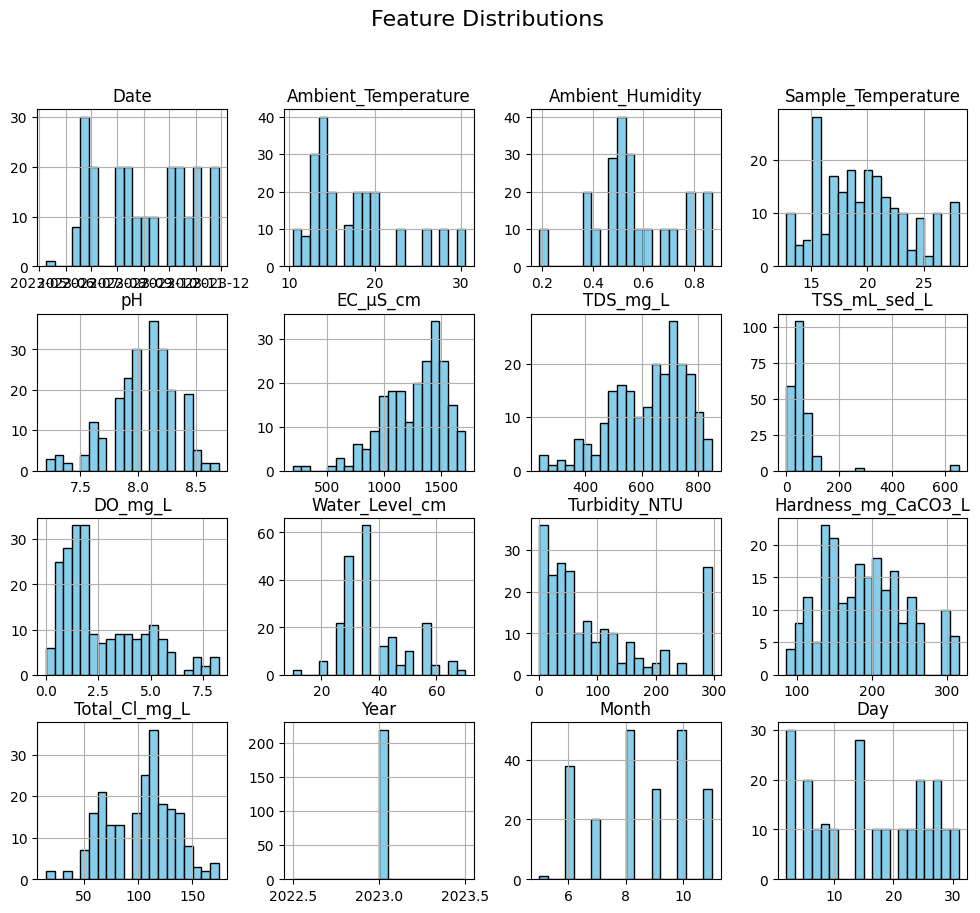

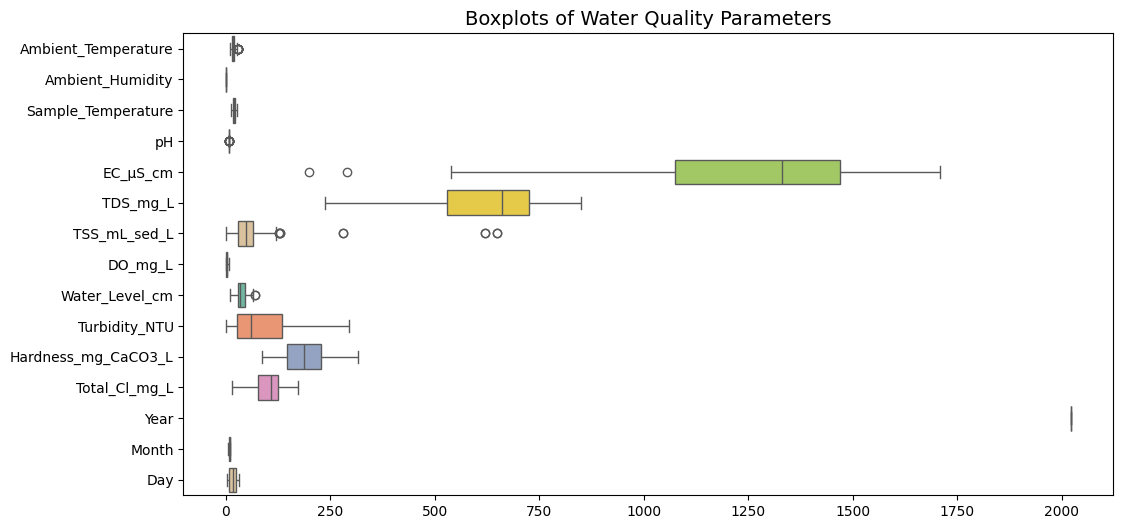

In [53]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplots of Water Quality Parameters", fontsize=14)
plt.show()


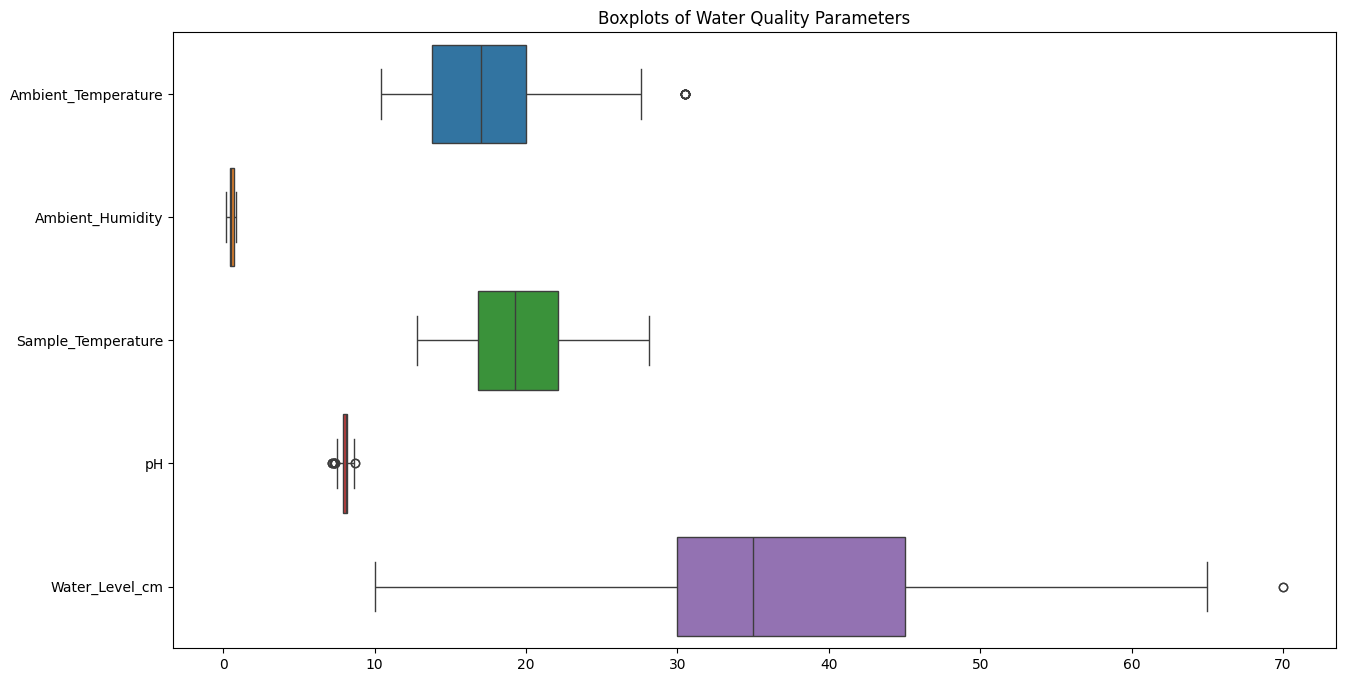

In [55]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols], orient='h')
plt.title("Boxplots of Water Quality Parameters")
plt.show()



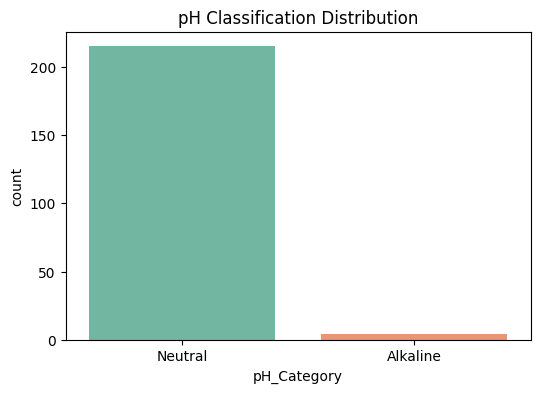

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pH_Category', palette='Set2')
plt.title("pH Classification Distribution")
plt.show()


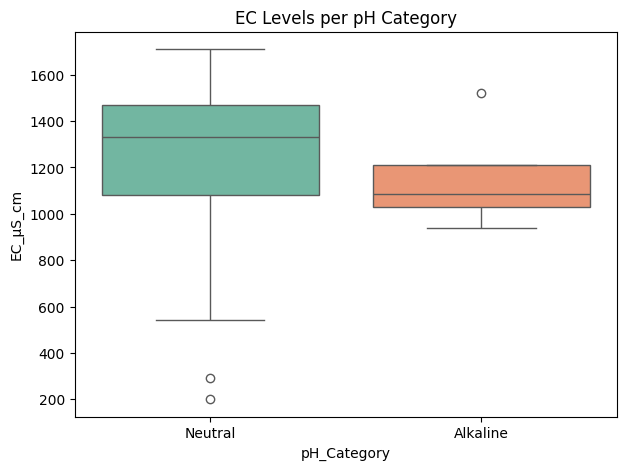

,pH,EC_µS_cm,TDS_mg_L,DO_mg_L
pH_Category,,,,
Alkaline,8.65,1157.50,570.00,5.75
Neutral,8.02,1266.56,626.16,2.56


In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="pH_Category", y="EC_µS_cm", palette="Set2")
plt.title("EC Levels per pH Category")
plt.show()
df.groupby("pH_Category")[['pH', 'EC_µS_cm', 'TDS_mg_L', 'DO_mg_L']].mean()


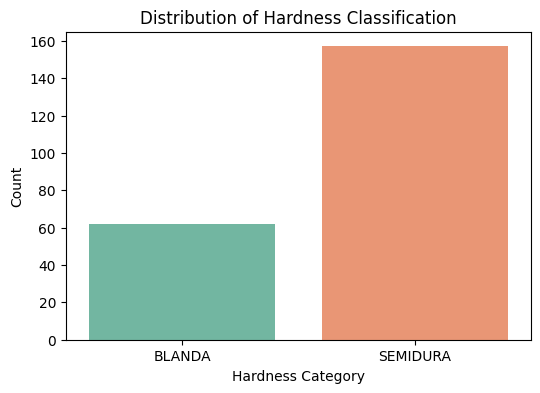

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Hardness_Classification', palette='Set2')
plt.title("Distribution of Hardness Classification")
plt.xlabel("Hardness Category")
plt.ylabel("Count")
plt.show()


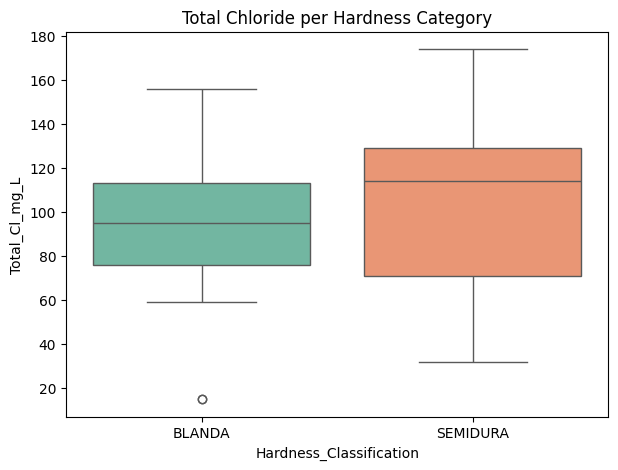

,Hardness_mg_CaCO3_L,Turbidity_NTU,TDS_mg_L
Hardness_Classification,,,
BLANDA,126.24,134.65,554.92
SEMIDURA,216.14,82.10,652.87


In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Hardness_Classification", y="Total_Cl_mg_L", palette="Set2")
plt.title("Total Chloride per Hardness Category")
plt.show()
df.groupby("Hardness_Classification")[['Hardness_mg_CaCO3_L', 'Turbidity_NTU', 'TDS_mg_L']].mean()



#BLANDA (soft water) → clear indication of high turbidity (dirty water)

#SEMIDURA (moderately hard) → clearer water but with more dissolved minerals


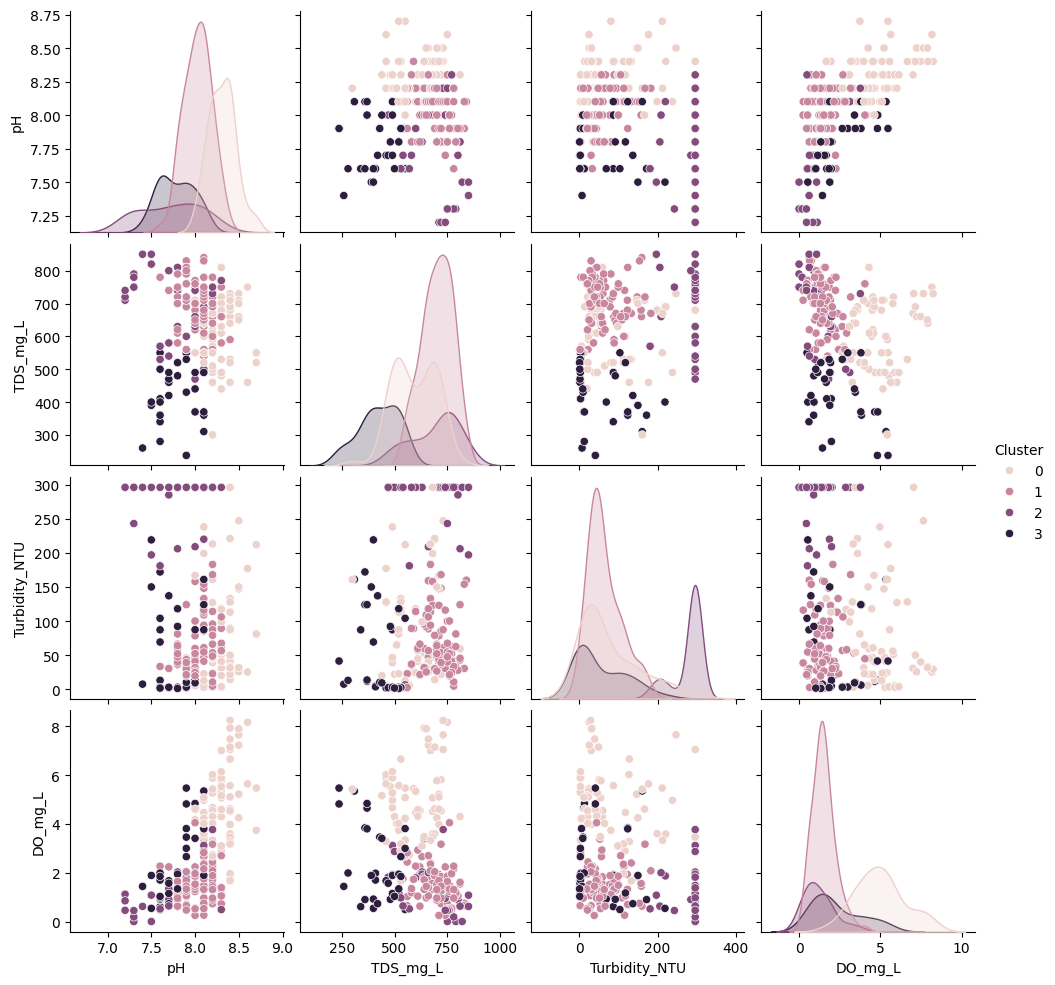

In [ ]:
cluster_features = df[['pH', 'TDS_mg_L', 'Turbidity_NTU', 'DO_mg_L']]

scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

sns.pairplot(df, vars=['pH','TDS_mg_L','Turbidity_NTU','DO_mg_L'], hue='Cluster')
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [57]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=np.number)), columns=df.select_dtypes(include=np.number).columns)

print("✅ Data Scaled Successfully!")
df_scaled.head()

✅ Data Scaled Successfully!


,Ambient_Temperature,Ambient_Humidity,Sample_Temperature,pH,EC_µS_cm,TDS_mg_L,TSS_mL_sed_L,DO_mg_L,Water_Level_cm,Turbidity_NTU,Hardness_mg_CaCO3_L,Total_Cl_mg_L,Year,Month,Day
0,0.33,0.41,0.41,0.73,0.95,0.93,0.00,0.52,0.42,0.20,0.27,0.89,0.00,0.00,0.24
1,0.07,0.41,0.01,0.60,0.53,0.41,0.03,0.64,0.42,0.14,0.03,0.40,0.00,0.17,0.41
2,0.07,0.41,0.01,0.67,0.53,0.41,0.03,0.57,0.42,0.13,0.00,0.42,0.00,0.17,0.41
3,0.07,0.41,0.01,0.73,0.76,0.71,0.00,0.85,0.42,0.10,0.50,0.64,0.00,0.17,0.41
4,0.07,0.41,0.01,0.87,0.76,0.69,0.00,0.88,0.42,0.08,0.48,0.64,0.00,0.17,0.41


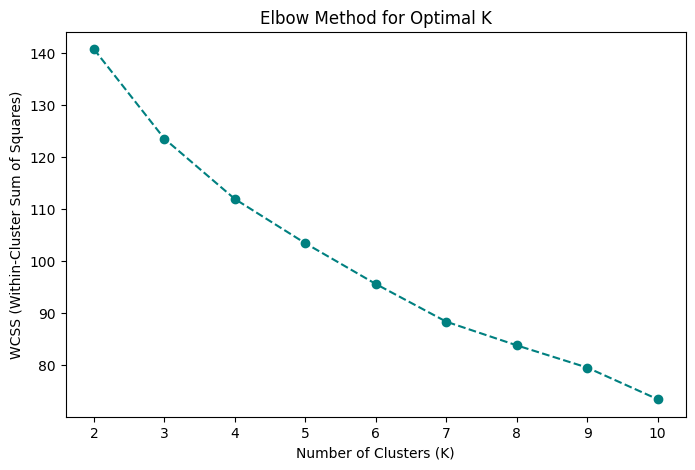

In [58]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select only numeric columns (excluding WQI)
features = df_scaled.columns.tolist()
X = df_scaled[features]

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='teal')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

In [59]:
# Assuming the Elbow shows a bend at K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

print("✅ K-Means clustering applied successfully.")
print(df['Cluster'].value_counts())

✅ K-Means clustering applied successfully.
Cluster
2    81
0    55
1    44
3    39
Name: count, dtype: int64


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
